In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:4f}, 정밀도 : {1:4f}, 재현율 : {2:4f}, F1 : {3:4f}, AUC : {4:4f}'.format(accuracy, precision, recall,f1, roc_auc))

In [7]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# 피처 데이터 세트와 레이블 데이터 세트 분리
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 156, stratify=y)

# 로지스틱 회귀 학습, 예측, 평가 수행
lr_clf = LogisticRegression(max_iter = 400)
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.798701, 정밀도 : 0.767442, 재현율 : 0.611111, F1 : 0.680412, AUC : 0.807222


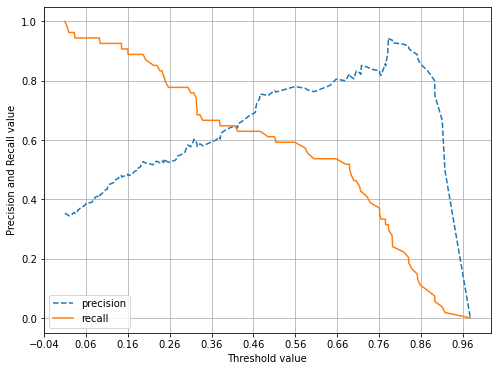

In [9]:
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

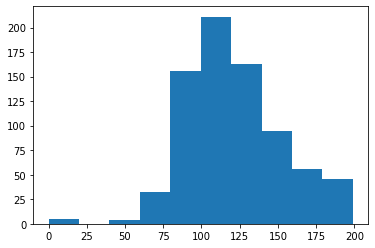

In [11]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [13]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2: 2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는  0.651042%
BloodPressure 0 건수는 35, 퍼센트는  4.557292%
SkinThickness 0 건수는 227, 퍼센트는  29.557292%
Insulin 0 건수는 374, 퍼센트는  48.697917%
BMI 0 건수는 11, 퍼센트는  1.432292%


In [14]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

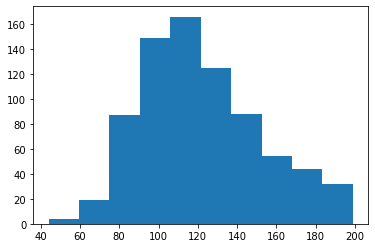

In [15]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [16]:
# 피처 데이터 세트와 레이블 데이터 세트 분리
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 156, stratify=y)

# 로지스틱 회귀 학습, 예측, 평가 수행
lr_clf = LogisticRegression(max_iter = 400)
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.798701, 정밀도 : 0.767442, 재현율 : 0.611111, F1 : 0.680412, AUC : 0.845370


In [23]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [24]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.3
오차 행렬
[[67 33]
 [11 43]]
정확도 : 0.714286, 정밀도 : 0.565789, 재현율 : 0.796296, F1 : 0.661538, AUC : 0.845370
임계값 :  0.33
오차 행렬
[[73 27]
 [12 42]]
정확도 : 0.746753, 정밀도 : 0.608696, 재현율 : 0.777778, F1 : 0.682927, AUC : 0.845370
임계값 :  0.36
오차 행렬
[[76 24]
 [15 39]]
정확도 : 0.746753, 정밀도 : 0.619048, 재현율 : 0.722222, F1 : 0.666667, AUC : 0.845370
임계값 :  0.39
오차 행렬
[[79 21]
 [16 38]]
정확도 : 0.759740, 정밀도 : 0.644068, 재현율 : 0.703704, F1 : 0.672566, AUC : 0.845370
임계값 :  0.42
오차 행렬
[[84 16]
 [18 36]]
정확도 : 0.779221, 정밀도 : 0.692308, 재현율 : 0.666667, F1 : 0.679245, AUC : 0.845370
임계값 :  0.45
오차 행렬
[[85 15]
 [18 36]]
정확도 : 0.785714, 정밀도 : 0.705882, 재현율 : 0.666667, F1 : 0.685714, AUC : 0.845370
임계값 :  0.48
오차 행렬
[[89 11]
 [19 35]]
정확도 : 0.805195, 정밀도 : 0.760870, 재현율 : 0.648148, F1 : 0.700000, AUC : 0.845370
임계값 :  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.798701, 정밀도 : 0.767442, 재현율 : 0.611111, F1 : 0.680412, AUC : 0.845370


In [25]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test,pred_th_048, pred_proba[:,1])

오차 행렬
[[89 11]
 [19 35]]
정확도 : 0.805195, 정밀도 : 0.760870, 재현율 : 0.648148, F1 : 0.700000, AUC : 0.845370
